In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras as kr

In [22]:
fashion_df = tf.keras.datasets.fashion_mnist
(train_x, train_label), (test_x, test_label) = fashion_df.load_data()

train_x = train_x/255
test_x = test_x/255


In [23]:
input = kr.Input(shape=(28,28,1), name="input")
l1 = kr.layers.Conv2D(filters=64, kernel_size=(3,3),padding="same", activation="relu", name="l1", input_shape=(28,28))(input)
# l2 = kr.layers.MaxPooling2D(pool_size=(2,2), name="l2")(l1)
l3 = kr.layers.Conv2D(filters=64, kernel_size=(3,3),padding="same", activation="relu")(l1)
l4 = kr.layers.MaxPooling2D(pool_size=(2,2))(l3)
f1 = kr.layers.Flatten(name="flatten")(l4)
l5 = kr.layers.Dense(64, activation="relu")(f1)
d1 = kr.layers.Dropout(0.5)(l5)
l6 = kr.layers.Dense(10, activation="softmax")(d1)

In [24]:
model = kr.Model(inputs=input, outputs=l6)

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
train_hist = model.fit(x=train_x, y=train_label, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.5303 - accuracy: 0.8138
Epoch 2/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.3436 - accuracy: 0.8766
Epoch 3/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2942 - accuracy: 0.8931
Epoch 4/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.2609 - accuracy: 0.9055
Epoch 5/10
1875/1875 [==============================] - 140s 74ms/step - loss: 0.2321 - accuracy: 0.9142
Epoch 6/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.2126 - accuracy: 0.9211
Epoch 7/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.1956 - accuracy: 0.9264
Epoch 8/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1790 - accuracy: 0.9317
Epoch 9/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1674 - accuracy: 0.9370
Epoch 10/10
1875/1875 [==============================] 

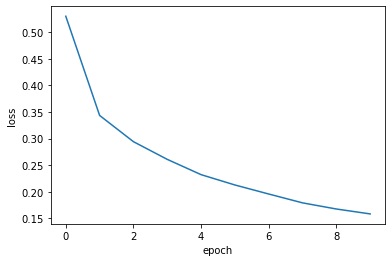

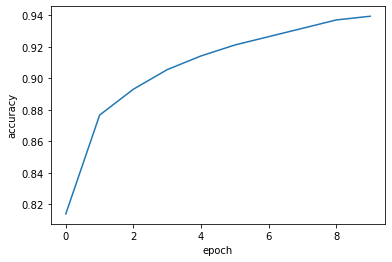

0.2597039043903351 0.9217000007629395


In [27]:
plt.figure()
plt.plot(train_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.figure()
plt.plot(train_hist.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

test_loss, test_accuracy = model.evaluate(x=test_x, y=test_label, verbose=0)
print(test_loss, test_accuracy)